In [ ]:
import pywt
import numpy as np
from statsmodels.robust import mad
import matplotlib.pyplot as plt;
import scipy.io as sio;

In [ ]:
def wnoisest(coeff):
    stdc = np.zeros((len(coeff),1));
    for i in range(0,len(coeff)):
        stdc[i] = (np.median(np.absolute(coeff[i])))/0.6745;
    return stdc;

Tipo de estimación???

In [ ]:
def threshold(coeff):
    Num_samples = 0;
    for i in range(0,len(coeff)):
        Num_samples = Num_samples + coeff[i].shape[0];
    
    thr = np.sqrt(2*(np.log(Num_samples)))
    return thr

Tipo de umbral??

In [ ]:
def wthresh(coeff):
    y   = list();
    s = wnoisest(coeff);
    print(s)
    thr = threshold(coeff)
    print(thr)
    for i in range(0,len(coeff)):
        y.append(np.multiply(coeff[i],np.abs(coeff[i])>(thr*s[i])));
    return thr,s,y;

In [ ]:
mat_contents = sio.loadmat('senal_prueba_wavelet.mat')
print(mat_contents.keys())
data = np.squeeze(mat_contents['senal']);

LL = int(np.floor(np.log2(data.shape[0])));

data_wavelet = pywt.wavedec( data, 'db6', level=8 );
print(len(data_wavelet))

details = data_wavelet[1:]
print(len(details))

dict_keys(['__header__', '__version__', '__globals__', 'senal'])
9
8


pywt.wavedec(data, wavelet, mode='symmetric', level=None, axis=-1)
Multilevel 1D Discrete Wavelet Transform of data.

Parameters:	
data: array_like
Input data

wavelet : Wavelet object or name string
Wavelet to use

mode : str, optional
Signal extension mode, see Modes.

level : int, optional
Decomposition level (must be >= 0). If level is None (default) then it will be calculated using the dwt_max_level function.

axis: int, optional
Axis over which to compute the DWT. If not given, the last axis is used.

Returns:	
[cA_n, cD_n, cD_n-1, …, cD2, cD1] : list
Ordered list of coefficients arrays where n denotes the level of decomposition. The first element (cA_n) of the result is approximation coefficients array and the following elements (cD_n - cD_1) are details coefficients arrays.

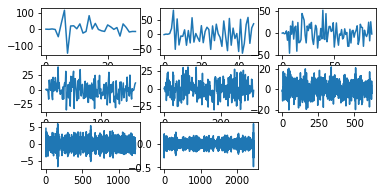

In [ ]:
for i in range(len(details)):
  plt.subplot(4,3,i+1)
  plt.plot(details[i])
plt.show()

[[20.93612279]
 [43.13573139]
 [20.92612799]
 [14.80615254]
 [11.25025841]
 [ 7.44957155]
 [ 1.62212971]
 [ 0.07299899]]
4.125131329484925


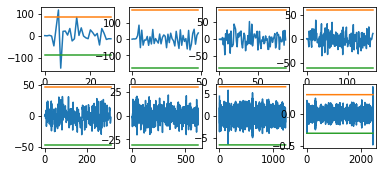

In [ ]:
thr, s, details_t = wthresh(details);

for i in range(len(details_t)):
  plt.subplot(3,4,i+1)
  plt.plot(details[i])
  plt.plot(thr*s[i]*np.ones((len(details[i]))))
  plt.plot(-1*thr*s[i]*np.ones((len(details[i]))))
plt.show()

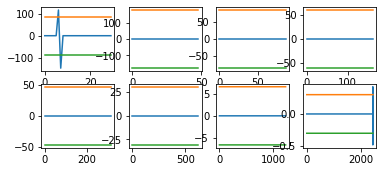

In [ ]:
for i in range(len(details_t)):
  plt.subplot(3,4,i+1)
  plt.plot(details_t[i])
  plt.plot(thr*s[i]*np.ones((len(details[i]))))
  plt.plot(-1*thr*s[i]*np.ones((len(details[i]))))
plt.show()

[]

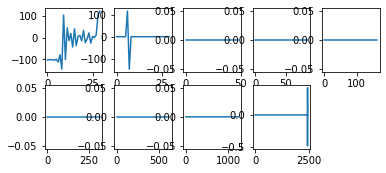

In [ ]:
coeff = list()
coeff.append(data_wavelet[0])

for i in range(len(details_t)):
  coeff.append(details_t[i])

for i in range(len(coeff)):
  plt.subplot(3,5,i+1)
  plt.plot(coeff[i])

plt.plot()

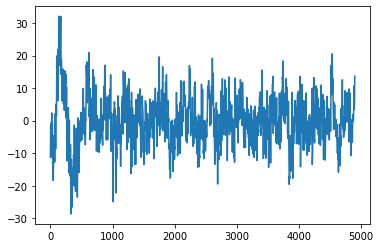

In [ ]:
plt.plot(data,label='Original')
plt.show()

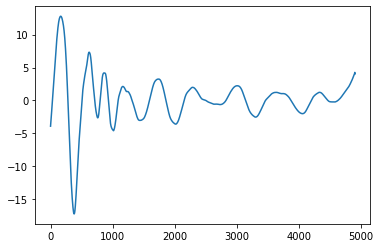

In [ ]:
x_rec = pywt.waverec( coeff, 'db6');
x_rec = x_rec[0:data.shape[0]];

plt.plot(x_rec,label='Reconstruida')
plt.show()

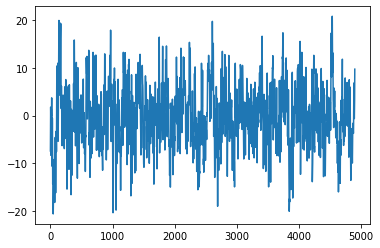

In [ ]:
x_filt = np.squeeze(data - x_rec);
plt.plot(x_filt,label='Diferencia')
plt.show()

In [ ]:
# 'rigrsure'
#        sx2 = (np.sort(np.absolute(Signal)))**2
#        risks = ((Num_samples-(2*(np.arange(1,Num_samples+1))))+((np.cumsum(sx2))+((np.arange(Num_samples-1,-1,-1))*sx2)))/Num_samples
#        best = np.argmin(risks)
#        thr = np.sqrt(sx2[best])